In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # Fixed typo here
import re
import string
import matplotlib.pyplot as plt
import sklearn

In [2]:

data_true = pd.read_csv('/content/drive/MyDrive/dataset/True.csv')
data_fake = pd.read_csv('/content/drive/MyDrive/dataset/Fake.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [8]:
data_true['class'] = 0
data_fake['class'] = 1

In [9]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis=0, inplace=True)
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i], axis=0, inplace=True)

In [10]:
data_manual_testing= pd.concat([data_true_manual_testing,data_fake_manual_testing], axis = 0)
data_manual_testing.to_csv("testing.csv")

In [11]:
data_merge = pd.concat([data_true,data_fake], axis =0 )
data_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


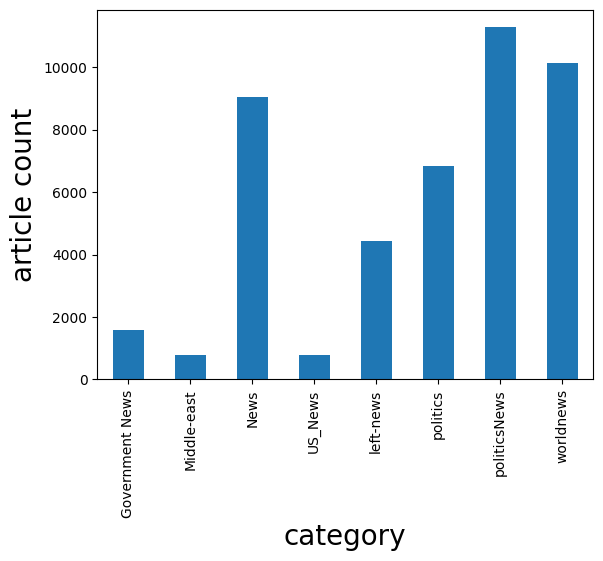

In [12]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.xlabel("category",size=20)
plt.ylabel("article count",size=20)
plt.show()

class
0    21407
1    23471
Name: text, dtype: int64
0=Fake news
1=True news


<function matplotlib.pyplot.show(close=None, block=None)>

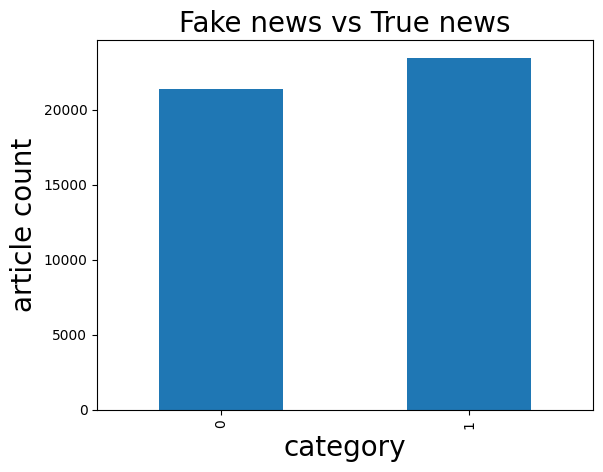

In [13]:
print(data_merge.groupby(['class'])['text'].count())
print("0=Fake news\n1=True news")
data_merge.groupby(['class'])['text'].count().plot(kind="bar")
plt.title("Fake news vs True news",size=20)
plt.xlabel("category",size=20)
plt.ylabel("article count",size=20)
plt.show

In [14]:
data = data_merge.drop(['title','subject','date'], axis=1)
data.head(10)

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",0
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",0
7,The following statements were posted to the ve...,0
8,The following statements were posted to the ve...,0
9,WASHINGTON (Reuters) - Alabama Secretary of St...,0


In [15]:
data = data.sample(frac=1)
data.head(10)

,text,class
5612,Even though the fact that the presumptive Repu...,1
14043,Don t let Hillary s cheerleaders in the mainst...,1
17440,BEIRUT (Reuters) - U.S.-backed militias in Syr...,0
12491,MOSCOW (Reuters) - Russia has suspended its di...,0
13166,Hillary Clinton delivered a disgusting speech ...,1
21160,FRANKFURT (Reuters) - Frankfurt city officials...,0
3967,"As Election Day approaches, the threat of viol...",1
8672,"CLEVELAND (Reuters) - Bourbon flowed, a jazz b...",0
15494,"SRINAGAR, India (Reuters) - Indian soldiers ki...",0
9463,Nancy Pelosi is obviously geographically chall...,1


In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [18]:
data['text']=data['text'].apply(filtering)
data.head(10)

,text,class
5612,even though the fact that the presumptive repu...,1
14043,don t let hillary s cheerleaders in the mainst...,1
17440,beirut reuters u s backed militias in syr...,0
12491,moscow reuters russia has suspended its di...,0
13166,hillary clinton delivered a disgusting speech ...,1
21160,frankfurt reuters frankfurt city officials...,0
3967,as election day approaches the threat of viol...,1
8672,cleveland reuters bourbon flowed a jazz b...,0
15494,srinagar india reuters indian soldiers ki...,0
9463,nancy pelosi is obviously geographically chall...,1


In [19]:
x=data['text']
y=data['class']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# You can now fit a classifier to the vectorized data
# For example, using Logistic Regression:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

# Predict on the test set
pred_lr=LR.predict(xv_test)

# Evaluate the model
print(classification_report(y_test, pred_lr))

# Vectorize the new input before prediction
new_text = ["modi is not pm of india"]
new_text_vectorized = vectorization.transform(new_text)
prediction = LR.predict(new_text_vectorized)

if prediction[0] == 0:
    print("This news is likely fake.")
else:
    print("This news is likely true.")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5382
           1       0.99      0.98      0.99      5838

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

This news is likely true.


In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)



DecisionTreeClassifier()

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xv_train,y_train)


RandomForestClassifier()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(xv_train,y_train)

KNeighborsClassifier()

In [25]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(xv_train,y_train)

LinearRegression()

In [26]:
def output_lable(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"



In [28]:
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(filtering)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_RF = RF.predict(new_xv_test)
  pred_KNN = KNN.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRF Prediction: {} \nKNN Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_RF[0]),output_lable(pred_KNN[0])))


In [29]:
news = str(input())
manual_testing(news)

LR Pediction


LR Prediction: None 
DT Prediction: Not A Fake News 
RF Prediction: Not A Fake News 
KNN Prediction: Not A Fake News
